In [97]:
#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import seaborn as sns
import numpy as np
import scipy.stats as stats
from pathlib import Path
import requests
import time
from pprint import pprint

In [5]:
# Create a path to the csv and read it into a Pandas DataFrame
csv_path = Path('data/merged_data_cleaned.csv')
coffee_df = pd.read_csv(csv_path)
coffee_df["Country.of.Origin"].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

In [6]:
coffee_df.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [7]:
coffee_df_new = coffee_df.rename(columns={'Total.Cup.Points': 'CoffeeScore',
                                            'Country.of.Origin': 'Country_of_Origin',
                                         'Processing.Method': 'Processing_Method'})

In [8]:
#Look at key metrics by species
#Coffee Score by Species
species_group = coffee_df_new.groupby('Species')
coffee_score_species_metrics = species_group.agg({"CoffeeScore": ["mean", "median", "var", "std", "sem"]})
coffee_score_species_metrics

CoffeeScore                                     
               mean median        var       std      sem
Species                                                 
Arabica   82.115927   82.5  12.360573  3.515761  0.09710
Robusta   80.868929   81.5   5.959617  2.441233  0.46135

In [9]:
#Given the high ariance in coffee scores, in particular among arabica variaties, we can use a box plot to show distribution of coffee scores

#Calculate upper and lower bounds, IQR and identify outliers

#Create boxplot
# plt.boxplot(coffee_df_new)
# plt.xticks([1, 2], ['Arabica', 'Robusta']) 
# plt.show()

In [10]:
#Flavor by Species
flavor_species_metrics = species_group.agg({"Flavor": ["mean", "median", "var", "std", "sem"]})
flavor_species_metrics

Flavor                                     
             mean median       var       std       sem
Species                                               
Arabica  7.518070   7.58  0.159983  0.399979  0.011047
Robusta  7.630714   7.71  0.092207  0.303656  0.057386

In [11]:
#Aroma by Species
aroma_species_metrics = species_group.agg({"Aroma": ["mean", "median", "var", "std", "sem"]})
aroma_species_metrics

Aroma                                     
             mean median       var       std       sem
Species                                               
Arabica  7.563806   7.58  0.143388  0.378666  0.010458
Robusta  7.702500   7.67  0.087708  0.296156  0.055968

In [12]:
#Aftertaste by Species
aftertaste_species_metrics = species_group.agg({"Aftertaste": ["mean", "median", "var", "std", "sem"]})
aftertaste_species_metrics

Aftertaste                                     
              mean median       var       std       sem
Species                                                
Arabica   7.397696   7.42  0.164121  0.405119  0.011189
Robusta   7.559643   7.67  0.117285  0.342469  0.064721

In [13]:
#Look at key metrics by processing method
processing_method_group = coffee_df_new.groupby('Processing_Method')
coffee_score_pm_metrics = processing_method_group.agg({'CoffeeScore': ["mean", "median", "var", "std", "sem"]})
coffee_score_pm_metrics

CoffeeScore                                       
                                 mean  median        var       std       sem
Processing_Method                                                           
Natural / Dry               82.245039  82.750   8.003929  2.829122  0.176133
Other                       81.278462  81.830  15.986422  3.998302  0.784132
Pulped natural / honey      82.807857  82.665   2.846787  1.687243  0.450935
Semi-washed / Semi-pulped   82.633571  82.500   3.121245  1.766705  0.236086
Washed / Wet                81.967816  82.420   7.184830  2.680453  0.093892

In [14]:
# Generate a bar graph of coffee scores by processing method
# plt.bar(processing_method_group['Processing_Method'], processing_method_group['CoffeeScore'])
# plt.xlabel("Processing_Method")
# plt.ylabel("CoffeeScore")
# plt.show()

In [15]:
#GroupBy Species and Country of Origin
#Count coffees by country for each species
species_by_country = coffee_df_new.groupby(['Species'])['Country_of_Origin'].value_counts()
species_by_country

#Look at percentage of coffees by country
#count_of_species = coffee_df_new['Species'].value_counts()
#count_of_species
#species_percent_by_country = species_by_country / count_of_species 
#species_percent_by_country

Species  Country_of_Origin           
Arabica  Mexico                          236
         Colombia                        183
         Guatemala                       181
         Brazil                          132
         Taiwan                           75
         United States (Hawaii)           73
         Honduras                         53
         Costa Rica                       51
         Ethiopia                         44
         Tanzania, United Republic Of     40
         Thailand                         32
         Nicaragua                        26
         Uganda                           26
         Kenya                            25
         El Salvador                      21
         Indonesia                        20
         China                            16
         Malawi                           11
         Peru                             10
         Myanmar                           8
         United States                     8
         Vietnam 

Arabica's Aroma:
Potential outliers are :[8.67, 8.75, 8.42, 8.25, 8.58, 8.42, 8.25, 8.67, 8.25, 8.33, 8.25, 8.33, 8.42, 8.25, 8.42, 8.5, 8.42, 8.42, 8.5, 8.25, 8.42, 8.33, 8.25, 8.33, 8.33, 8.33, 8.25, 8.42, 8.5, 8.42, 5.08, 8.25, 6.92, 6.83, 6.92, 6.92, 6.83, 6.92, 6.92, 6.92, 6.92, 6.75, 6.75, 6.75, 6.92, 6.83, 6.83, 6.83, 6.92, 6.83, 6.83, 6.67, 6.42, 6.17, 6.83, 6.83, 6.67, 6.75, 6.75, 6.5, 6.92, 6.92, 6.92, 6.33, 6.92, 6.5, 6.92, 6.67, 6.75, 0.0] 
Interquartile Range is :0.33

 
Robusta's Aroma:
Potential outliers are :[6.75] 
Interquartile Range is :0.34

 


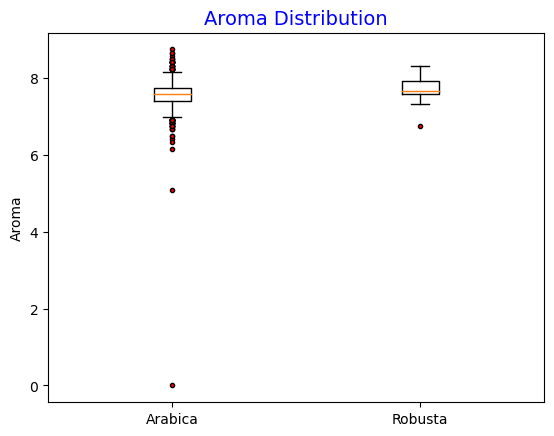

Arabica's Flavor:
Potential outliers are :[8.83, 8.67, 8.5, 8.58, 8.5, 8.42, 8.5, 8.67, 8.58, 8.67, 8.42, 8.67, 8.42, 8.5, 8.5, 8.42, 8.42, 6.67, 6.5, 6.5, 6.08, 6.17, 6.33, 6.5, 6.58, 6.5, 6.5, 6.5, 6.5, 6.67, 6.33, 6.58, 6.42, 6.58, 6.5, 6.67, 6.5, 6.17, 6.33, 6.58, 6.58, 6.67, 0.0] 
Interquartile Range is :0.42

 
Robusta's Flavor:
Potential outliers are :[6.83, 6.67] 
Interquartile Range is :0.27

 


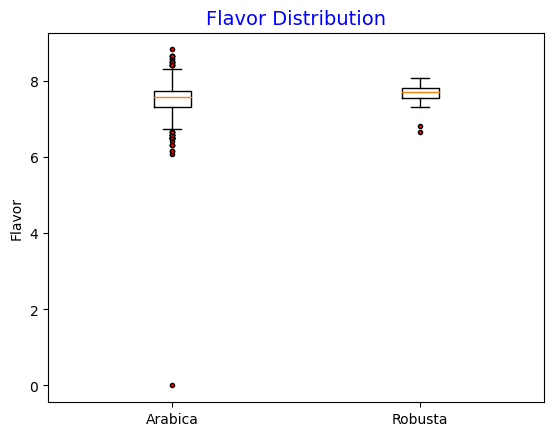

Arabica's Aftertaste:
Potential outliers are :[8.67, 8.5, 8.42, 8.42, 8.25, 8.42, 8.33, 8.5, 8.58, 8.5, 8.25, 8.17, 8.33, 8.08, 8.5, 8.58, 8.25, 8.08, 8.08, 8.17, 8.17, 8.08, 8.17, 8.08, 8.17, 8.08, 8.08, 8.25, 8.17, 8.17, 6.75, 6.33, 6.75, 6.75, 6.75, 6.75, 6.42, 6.58, 6.67, 6.75, 6.33, 6.67, 6.75, 6.75, 6.67, 6.5, 6.17, 6.67, 6.67, 6.17, 6.67, 6.67, 6.58, 6.58, 6.33, 6.67, 6.42, 6.5, 6.58, 6.5, 6.5, 6.67, 6.5, 6.33, 6.67, 6.67, 6.75, 6.58, 6.67, 6.17, 6.17, 6.5, 6.67, 6.17, 6.58, 6.33, 6.42, 6.17, 6.17, 6.17, 6.25, 6.42, 6.33, 6.67, 0.0] 
Interquartile Range is :0.33

 
Robusta's Aftertaste:
Potential outliers are :[6.75, 6.5] 
Interquartile Range is :0.37

 


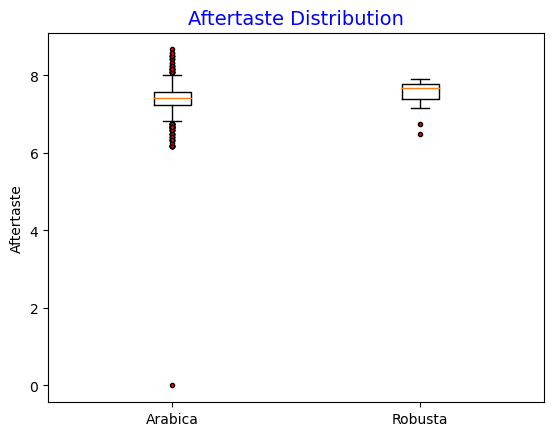

Arabica's Acidity:
Potential outliers are :[8.75, 8.58, 8.42, 8.42, 8.5, 8.5, 8.5, 8.42, 8.42, 8.5, 8.5, 8.42, 8.5, 8.5, 8.42, 5.25, 6.67, 6.67, 6.08, 6.67, 6.67, 6.5, 6.67, 6.25, 0.0] 
Interquartile Range is :0.42

 
Robusta's Acidity:
Potential outliers are :[6.83] 
Interquartile Range is :0.27

 


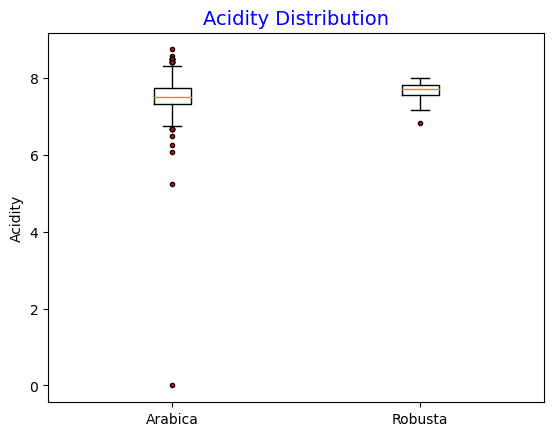

Arabica's Body:
Potential outliers are :[8.5, 8.42, 8.33, 8.5, 8.42, 8.25, 8.25, 8.33, 8.33, 8.25, 8.58, 8.5, 8.42, 8.25, 8.33, 8.33, 8.25, 5.25, 8.33, 6.75, 6.75, 6.75, 6.67, 6.33, 6.75, 6.33, 6.5, 6.67, 6.42, 0.0] 
Interquartile Range is :0.34

 
Robusta's Body:
Potential outliers are :[5.08, 5.17, 6.92] 
Interquartile Range is :0.33

 


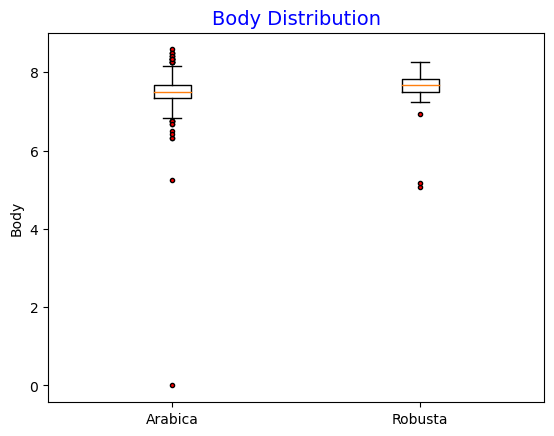

Arabica's Balance:
Potential outliers are :[8.42, 8.42, 8.42, 8.5, 8.42, 8.42, 8.75, 8.42, 8.58, 8.58, 8.5, 8.58, 8.5, 8.5, 8.58, 8.5, 8.5, 8.58, 8.75, 8.58, 8.5, 8.58, 8.42, 6.58, 6.58, 6.33, 6.67, 6.58, 6.42, 6.67, 6.5, 6.5, 6.17, 6.17, 6.17, 6.67, 6.08, 6.67, 0.0] 
Interquartile Range is :0.42

 
Robusta's Balance:
Potential outliers are :[5.25, 7.0, 6.83] 
Interquartile Range is :0.33

 


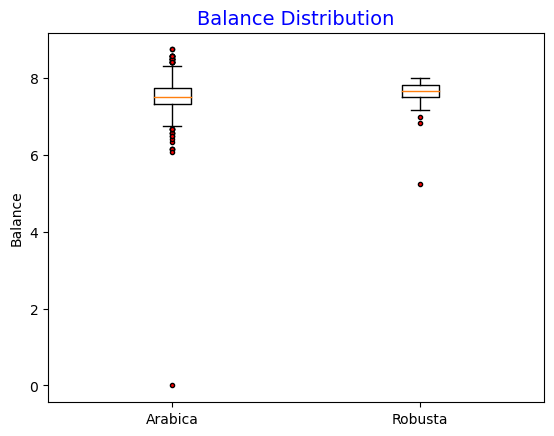

Arabica's Uniformity:
Potential outliers are :[9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.5, 9.33, 9.33, 8.67, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.0, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 6.67, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 8.67, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 8.67, 9.33, 6.67, 8.0, 9.33, 9.33, 9.33, 9.33, 6.67, 9.33, 8.67, 9.33, 9.33, 8.67, 9.33, 9.33, 9.33, 8.67, 8.67, 8.67, 9.33, 8.67, 9.33, 8.67, 6.67, 9.33, 9.33, 9.33, 8.67, 9.33, 9.33, 9.33, 9.33, 9.33, 8.0, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 8.67, 9.33, 8.67, 9.33, 9.33, 9.33, 8.67, 8.67, 9.33, 9.33, 8.67, 9.33, 8.67, 8.0, 8.67, 9.33, 8.67, 8.0, 7.33, 8.0, 8.67, 8.0, 6.67, 8.0, 9.33, 9.33, 8.67, 8.67, 8.0, 9.33, 9.33, 9.33, 8.0, 9.33, 9.33, 9.33, 8.67, 8.67, 8.67, 9.33, 9.33, 8.67, 8.67, 8.0, 7.33, 9.33, 9.33, 9.33, 8.0, 8.0, 8.67, 8.0, 8.67, 8.

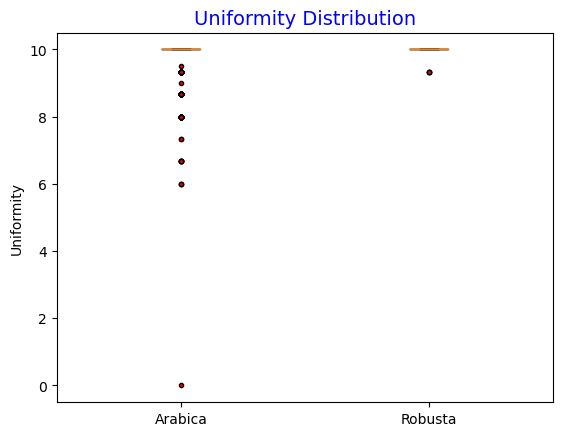

Arabica's Clean.Cup:
Potential outliers are :[9.33, 9.33, 8.67, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 6.67, 9.33, 9.33, 9.33, 6.67, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 6.67, 9.33, 9.33, 9.33, 8.67, 9.33, 9.33, 9.33, 8.67, 9.33, 8.67, 9.33, 9.33, 8.67, 9.33, 9.33, 8.0, 9.33, 9.33, 9.33, 6.67, 9.33, 9.33, 9.33, 8.67, 9.33, 9.33, 9.33, 9.33, 9.33, 6.67, 9.33, 9.33, 8.0, 9.33, 8.67, 8.67, 9.33, 8.67, 9.33, 9.33, 9.33, 9.33, 8.67, 9.33, 9.33, 8.0, 9.33, 9.33, 9.33, 8.67, 5.33, 9.33, 8.67, 8.67, 8.0, 7.33, 8.67, 8.0, 8.0, 8.0, 6.0, 6.67, 7.33, 6.67, 8.67, 5.33, 7.33, 8.67, 6.67, 6.67, 2.67, 6.67, 8.0, 8.0, 8.0, 6.67, 6.67, 5.33, 6.67, 2.67, 6.0, 6.0, 6.0, 8.0, 8.0, 8.0, 0.0, 6.0, 6.0, 1.33, 0.0] 
Interquartile Range is :0.0

 
Robusta's Clean.Cup:
Potential outliers are :[9.33, 9.33, 9.33] 
Interquartile Range is :0.0

 


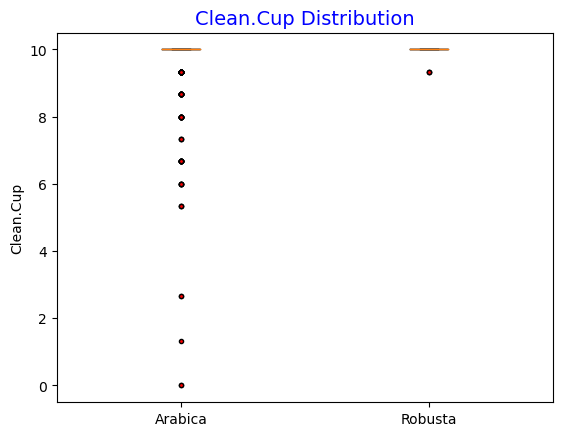

Arabica's Sweetness:
Potential outliers are :[9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 8.67, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 6.67, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 9.33, 8.67, 9.33, 9.33, 9.33, 9.33, 9.33, 6.67, 9.33, 9.33, 8.67, 9.33, 8.67, 9.33, 8.67, 9.33, 9.33, 9.33, 9.33, 6.67, 8.67, 9.33, 9.33, 8.67, 9.33, 8.67, 8.67, 9.33, 9.33, 9.33, 9.33, 8.0, 9.33, 6.0, 9.33, 9.33, 6.67, 8.67, 9.33, 8.0, 9.33, 9.33, 8.0, 6.67, 8.67, 6.67, 8.0, 8.0, 6.67, 9.33, 8.67, 8.0, 8.0, 8.0, 6.0, 6.0, 1.33, 0.0] 
Interquartile Range is :0.0

 
Robusta's Sweetness:
Potential outliers are :[8.42, 7.08, 6.67] 
Interquartile Range is :0.25

 


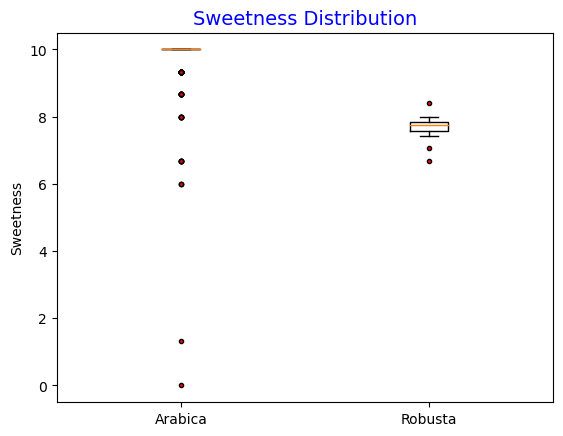

Arabica's Cupper.Points:
Potential outliers are :[8.75, 8.58, 9.25, 8.67, 8.58, 9.0, 8.67, 8.58, 8.58, 8.83, 8.58, 10.0, 10.0, 10.0, 10.0, 5.17, 5.25, 5.42, 6.17, 6.17, 6.42, 6.33, 6.42, 6.0, 6.42, 6.25, 6.42, 6.33, 6.33, 6.42, 6.17, 0.0] 
Interquartile Range is :0.5

 
Robusta's Cupper.Points:
Potential outliers are :[8.58, 6.92] 
Interquartile Range is :0.34

 


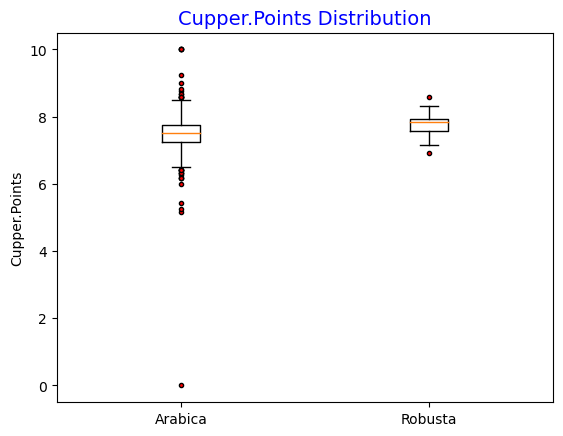

Arabica's Total.Cup.Points:
Potential outliers are :[90.58, 89.92, 89.75, 89.0, 88.83, 88.83, 88.75, 88.67, 88.42, 88.25, 88.08, 87.92, 87.92, 87.92, 87.83, 87.58, 77.33, 77.33, 77.33, 77.25, 77.25, 77.17, 77.0, 76.83, 76.75, 76.5, 76.42, 76.33, 76.33, 76.25, 76.17, 76.17, 76.17, 76.08, 76.0, 75.83, 75.67, 75.58, 75.58, 75.5, 75.17, 75.17, 75.17, 75.0, 74.92, 74.83, 74.75, 74.75, 74.67, 74.42, 74.33, 74.33, 74.0, 73.83, 73.67, 73.5, 73.42, 72.92, 72.83, 72.58, 72.33, 71.75, 71.08, 71.0, 70.75, 70.67, 69.33, 69.17, 69.17, 68.33, 67.92, 63.08, 59.83, 0.0] 
Interquartile Range is :2.5

 
Robusta's Total.Cup.Points:
Potential outliers are :[75.08, 73.75] 
Interquartile Range is :2.35

 


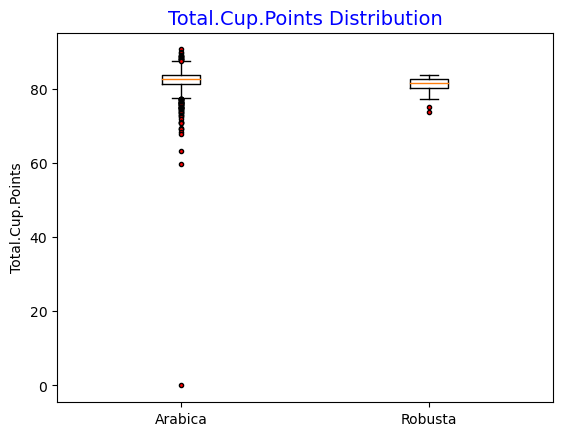

Arabica's Moisture:
Potential outliers are :[0.0, 0.03, 0.03, 0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04, 0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.04, 0.0, 0.0, 0.0, 0.02, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.21, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

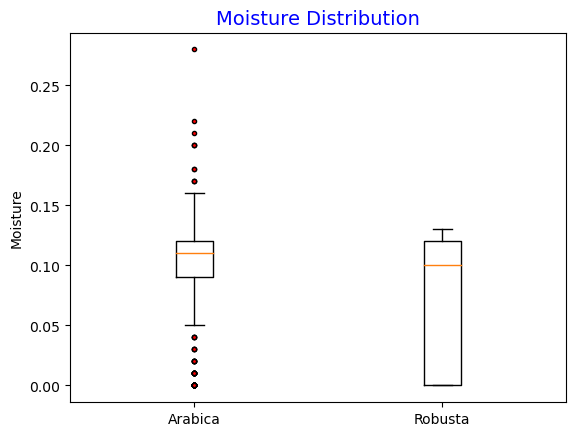

Arabica's Category.One.Defects:
Potential outliers are :[1, 2, 1, 1, 1, 4, 2, 4, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2, 2, 6, 1, 4, 3, 1, 4, 1, 1, 1, 1, 3, 2, 4, 10, 1, 1, 1, 10, 1, 1, 1, 5, 1, 4, 1, 1, 1, 2, 1, 3, 4, 1, 2, 1, 1, 2, 10, 3, 1, 1, 1, 1, 1, 1, 1, 5, 1, 31, 1, 2, 3, 1, 1, 11, 2, 4, 2, 1, 6, 1, 1, 2, 1, 2, 1, 2, 1, 6, 2, 1, 2, 2, 3, 2, 1, 1, 1, 1, 3, 1, 3, 1, 2, 2, 1, 1, 2, 2, 2, 1, 3, 2, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 5, 5, 2, 1, 2, 2, 1, 1, 1, 2, 4, 1, 5, 1, 4, 1, 2, 1, 12, 1, 1, 1, 3, 7, 1, 1, 5, 1, 1, 1, 1, 1, 5, 3, 7, 5, 1, 1, 1, 1, 3, 1, 31, 2, 4, 3, 2, 2, 1, 3, 2, 1, 2, 1, 2, 1, 4, 1, 1, 7, 2, 4, 4, 23, 15, 1, 1, 3, 9, 1, 1, 5, 1, 4, 8, 1] 
Interquartile Range is :0.0

 
Robusta's Category.One.Defects:
Potential outliers are :[20, 63] 
Interquartile Range is :0.0

 


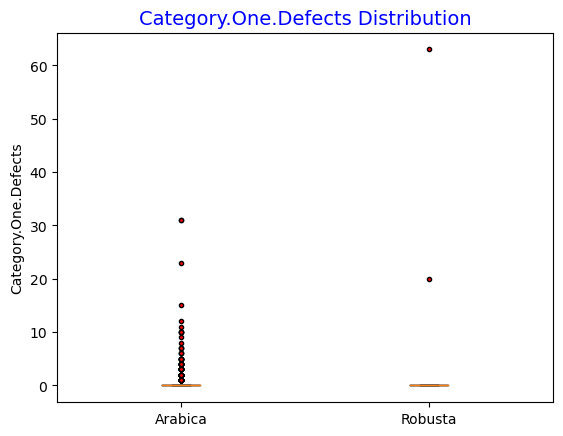

Arabica's Quakers:
Potential outliers are :[1.0, 1.0, 4.0, 2.0, 1.0, 1.0, 5.0, 6.0, 1.0, 3.0, 1.0, 2.0, 4.0, 1.0, 3.0, 2.0, 11.0, 2.0, 3.0, 2.0, 7.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 3.0, 2.0, 5.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 5.0, 9.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 3.0, 4.0, 2.0, 1.0, 2.0, 6.0, 6.0, 2.0, 1.0, 1.0, 7.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 2.0, 2.0, 6.0, 2.0, 2.0, 4.0, 1.0, 1.0, 1.0, 4.0, 2.0, 8.0, 2.0, 5.0, 7.0, 1.0, 1.0, 1.0] 
Interquartile Range is :0.0

 
Robusta's Quakers:
Potential outliers are :[] 
Interquartile Range is :0.0

 


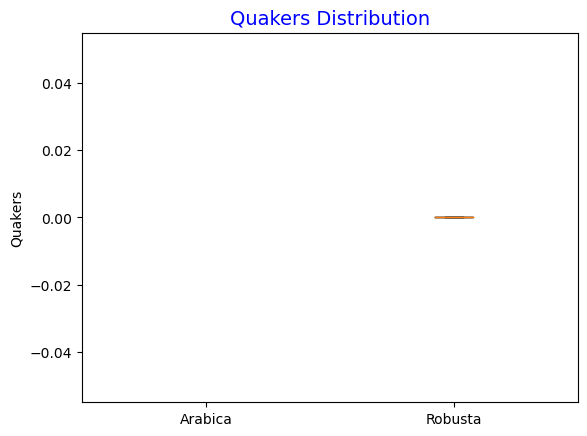

Arabica's Category.Two.Defects:
Potential outliers are :[18, 15, 29, 16, 15, 13, 40, 26, 32, 13, 11, 13, 21, 18, 14, 12, 12, 13, 20, 20, 16, 17, 15, 17, 11, 14, 11, 14, 14, 13, 13, 11, 20, 12, 23, 14, 13, 17, 17, 14, 13, 12, 16, 12, 11, 12, 14, 16, 21, 26, 13, 12, 12, 17, 12, 22, 12, 11, 19, 20, 30, 23, 19, 20, 34, 45, 12, 12, 17, 38, 14, 47, 31, 28, 15, 11, 14, 26, 12, 15, 20, 20, 29, 30, 11, 27, 19, 17, 16, 15, 24, 55, 20, 16] 
Interquartile Range is :4.0

 
Robusta's Category.Two.Defects:
Potential outliers are :[7, 6, 7, 6, 9] 
Interquartile Range is :2.0

 


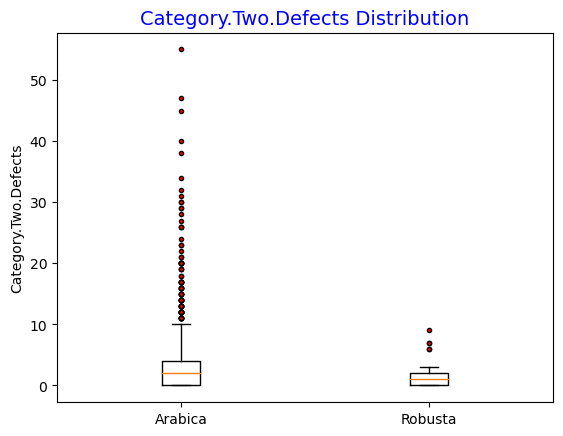

Arabica's altitude_mean_meters:
Potential outliers are :[12.0, 12.0, 2560.0, 1.0, 170.0, 2560.0, 3280.0, 250.5, 2527.0, 1.0, 175.0, 168.0, 250.5, 1.0, 11000.0, 157.8864, 165.0, 1.0, 3850.0, 200.0, 157.8864, 1.0, 200.0, 1.0, 1.0, 1.0, 13.0, 2500.0, 157.8864, 3280.0, 1.0, 1.0, 4001.0, 1.0, 150.0, 190164.0, 13.0, 180.0, 125.0, 110.0, 1.0, 3280.0, 200.0, 300.0, 100.0, 3825.0, 110000.0, 185.0, 50.0, 280.0, 3800.0, 4287.0, 200.0, 150.0, 250.0, 3845.0, 250.0, 190164.0, 200.0, 12.0, 3500.0] 
Interquartile Range is :500.0

 
Robusta's altitude_mean_meters:
Potential outliers are :[3170.0, 3000.0, 3140.0, 3000.0] 
Interquartile Range is :693.0

 


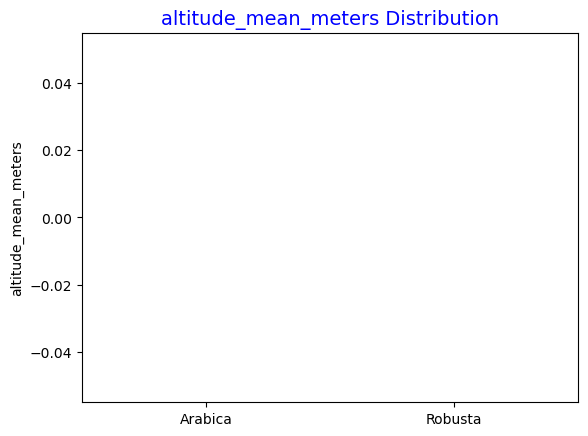

Arabica's Number.of.Bags:
Potential outliers are :[1062] 
Interquartile Range is :260.5

 
Robusta's Number.of.Bags:
Potential outliers are :[] 
Interquartile Range is :319.0

 


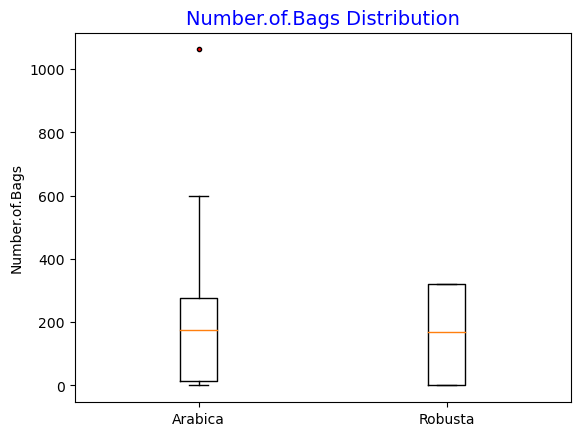

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
species = ["Arabica", "Robusta"]
metrics = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers', 'Category.Two.Defects','altitude_mean_meters','Number.of.Bags']
metric_value = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for j,m in enumerate(metrics):
    for i,sp in enumerate(species):
        metric_value.append(coffee_df.loc[(coffee_df["Species"]==sp),f"{m}"])
        percentiles = metric_value[i].quantile([0.25,0.5,0.75])
        upperq = percentiles[0.75]
        lowerq = percentiles[0.25]
        IQR = upperq-lowerq
        upper_lim = upperq+(1.5*IQR)
        lower_lim = lowerq-(1.5*IQR)
        outliers = [tv for tv in metric_value[i] if (tv<lower_lim) | (tv>upper_lim)]
        print(f"{(sp)}'s {m}:\nPotential outliers are :{outliers} \nInterquartile Range is :{round(IQR,2)}\n\n ")
        
    plt.boxplot(metric_value,0,flierprops={'marker': '.', 'markersize': 6, 'markerfacecolor': 'r','markeredgecolor':'k','linewidth':'1'})

    font = {'color':  'blue','fontweight': '3','fontsize': 14}    
    plt.title(f"{m} Distribution",fontdict=font)       

    plt.ylabel(f"{m}")
    plt.xticks([int(i+1) for i in range(len(species))],labels = species)
    plt.show()
    metric_value=[]

FileNotFoundError: [Errno 2] No such file or directory: 'data/Species/Arabica:Aroma-Flavor.png'

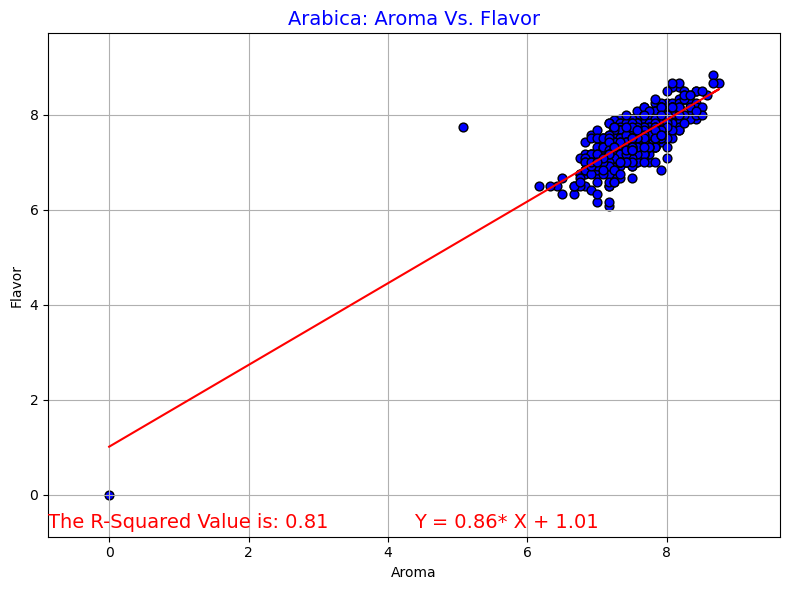

In [17]:
# Define a function to create Linear Regression plots
def plot_scatters(Dataframe,X_Column_List,Y_Column_List,Categories):

    for j,X_Column in enumerate(X_Column_List): 
        
        for i,Y_Column in enumerate(Y_Column_List):

            for h,hem in enumerate(Categories):
                        
                        if X_Column== Y_Column:
                            continue

                        plot_df =  Dataframe.loc[Dataframe["Species"]== hem,[X_Column,Y_Column]].reset_index(drop=True)
                        plot_df.plot(kind="scatter",x=X_Column,y=Y_Column,s=40,marker ="o",color="blue",edgecolor ="k",grid=True, figsize=(8,6),\
                        xlabel = f"{X_Column}", ylabel = f"{Y_Column}") 
                        font = {'color':  'blue','fontweight': '3','fontsize': 14}    


                        plt.title(f"{hem}: {X_Column} Vs. {Y_Column}",fontdict=font)  

                        xaxis = plot_df[X_Column]
                        yaxis =  plot_df[Y_Column]

                        xmin = xaxis.min()- 0.1 * (xaxis.max()-xaxis.min())
                        xmax= xaxis.max()+ 0.1 * (xaxis.max()-xaxis.min())
                        ymin=yaxis.min()- 0.1 * (yaxis.max()-yaxis.min())
                        ymax=yaxis.max()+ 0.1 * (yaxis.max()-yaxis.min())
                        plt.xlim(xmin,xmax)
                        plt.ylim(ymin,ymax)

                        (slope, intercept, r, p, std_e) = stats.linregress(xaxis,yaxis)
                        regress_line = (slope * xaxis) + intercept
                        regress_eq = "Y = " + str(round(slope,2))+ "* X + " + str(round(intercept,2))

                        plt.plot(xaxis,regress_line,color = "r")
                        plt.annotate(regress_eq,xy=(xmin+((xmax - xmin)/2),yaxis.min()- 0.08 * (yaxis.max()-yaxis.min())),color="r",fontsize=14)
                        plt.annotate(f"The R-Squared Value is: {round(r,2)}",xy=(xmin,yaxis.min()- 0.08 * (yaxis.max()-yaxis.min())),color="r",fontsize=14)
                        plt.tight_layout()
                        
                        plt.savefig(f"data/Species/{hem}:{X_Column}-{Y_Column}.png")

                
species = ["Arabica", "Robusta"]
y_col_list = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body','Balance', 'Uniformity', 'Clean.Cup', 'Sweetness','Moisture'\
              , 'Category.One.Defects',  'Category.Two.Defects','altitude_mean_meters','Number.of.Bags']
x_col_list = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body','Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture'\
              , 'Category.One.Defects', 'Category.Two.Defects','altitude_mean_meters','Number.of.Bags']

plot_scatters(coffee_df,x_col_list,y_col_list,species)        

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
countries = ["Arabica", "Robusta"]
metrics = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers', 'Category.Two.Defects','altitude_mean_meters','Number.of.Bags']
metric_value = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for j,m in enumerate(metrics):
    for i,sp in enumerate(species):
        metric_value.append(coffee_df.loc[(coffee_df["Species"]==sp),f"{m}"])
        percentiles = metric_value[i].quantile([0.25,0.5,0.75])
        upperq = percentiles[0.75]
        lowerq = percentiles[0.25]
        IQR = upperq-lowerq
        upper_lim = upperq+(1.5*IQR)
        lower_lim = lowerq-(1.5*IQR)
        outliers = [tv for tv in metric_value[i] if (tv<lower_lim) | (tv>upper_lim)]
        print(f"{(sp)}'s {m}:\nPotential outliers are :{outliers} \nInterquartile Range is :{round(IQR,2)}\n\n ")
        
    plt.boxplot(metric_value,0,flierprops={'marker': '.', 'markersize': 6, 'markerfacecolor': 'r','markeredgecolor':'k','linewidth':'1'})

    font = {'color':  'blue','fontweight': '3','fontsize': 14}    
    plt.title(f"{m} Distribution",fontdict=font)       

    plt.ylabel(f"{m}")
    plt.xticks([int(i+1) for i in range(len(species))],labels = species)
    plt.show()
    metric_value=[]
    

C:\Users\ganes\.conda\envs\dev\lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


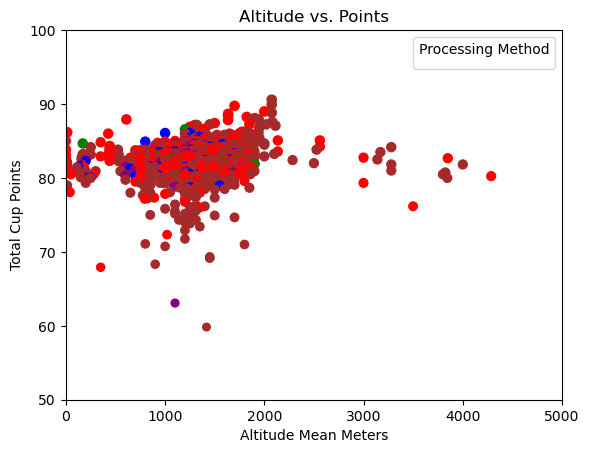

In [130]:
coffee_process_df = coffee_df.copy()
#coffee_process_df['Processing.Method.Index'] = np.nan
conditions = [
    coffee_process_df['Processing.Method'] == "Natural / Dry",
    coffee_process_df['Processing.Method'] == "Pulped natural / honey",
    coffee_process_df['Processing.Method'] == "Semi-washed / Semi-pulped",
    coffee_process_df['Processing.Method'] == "Washed / Wet",
    coffee_process_df['Processing.Method'] == "Other",
    coffee_process_df['Processing.Method'] == ""
]

values = ['0', '1', '2', '3','4','5']

coffee_process_df['Processing.Method.Index'] = np.select(conditions, values)
colors = {0:'red', 1:'green', 2:'blue', 3:'brown', 4:'purple', 5:'white'}

scatter = plt.scatter(coffee_process_df['altitude_mean_meters'],coffee_process_df['Total.Cup.Points'],s = 0.5*coffee_process_df['Total.Cup.Points'], c=[colors[int(i)] for i in coffee_process_df['Processing.Method.Index']])

plt.title("Altitude vs. Points")
plt.xlabel("Altitude Mean Meters")
plt.ylabel("Total Cup Points")
plt.xlim(0,5000)
plt.ylim(50,100)
#plt.legend(['red:Natural/Dry', 'green:Pulped natural/honey', 'blue: Semi-washed / Semi-pulped', 'brown:Washed/Wet', 'purple:Other'])
plt.legend(*scatter.legend_elements(num=5),
                    loc="upper right", title="Processing Method")


plt.show()